# Stacking und einfacher Durchschnitt im Vergleich

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plotlib
%matplotlib inline

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score;
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1, make_friedman3
from sklearn.utils import check_random_state
from IPython.display import display, Math, Latex,Markdown # rendering latex formula in code output


from dataclasses import dataclass

import pandas as pd

In [2]:

plt.style.use('ggplot')

plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 24, 11
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.serif'] = "cm"
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'


In [3]:
RANDOM_STATE=695
np.random.seed(RANDOM_STATE)

In [4]:
%run functions/functions.ipynb

In [5]:
%run models/stacking_model.ipynb

In [6]:
%run visualisation/visualisation_functions.ipynb

In [7]:
%run metrics/neg_rmse.ipynb

# Erstellung der Modelle

In [8]:
linear_regression_model = LinearRegression()

In [9]:
linear_regression_meta_model = LinearRegression()

In [10]:
random_forrest_model = RandomForestRegressor(n_estimators=10)

# Erstellung des einfachen Durchschnitts sowie des Stacking Modells

Hypothese Stacking wird bei allen Funktionen genauere Vorhersagen treffen als der einfache Durchschnitt.

In [11]:
%run models/averaging_model.ipynb

In [12]:
averageging_model = AveragingModels([random_forrest_model,linear_regression_model,linear_regression_meta_model])

In [13]:
stacking_model = StackingAveragedModels(base_models=[linear_regression_model,random_forrest_model],meta_model=linear_regression_meta_model)

Vergleich der $R^2$ sowie negative RMSE Werte zwischen den Modellen

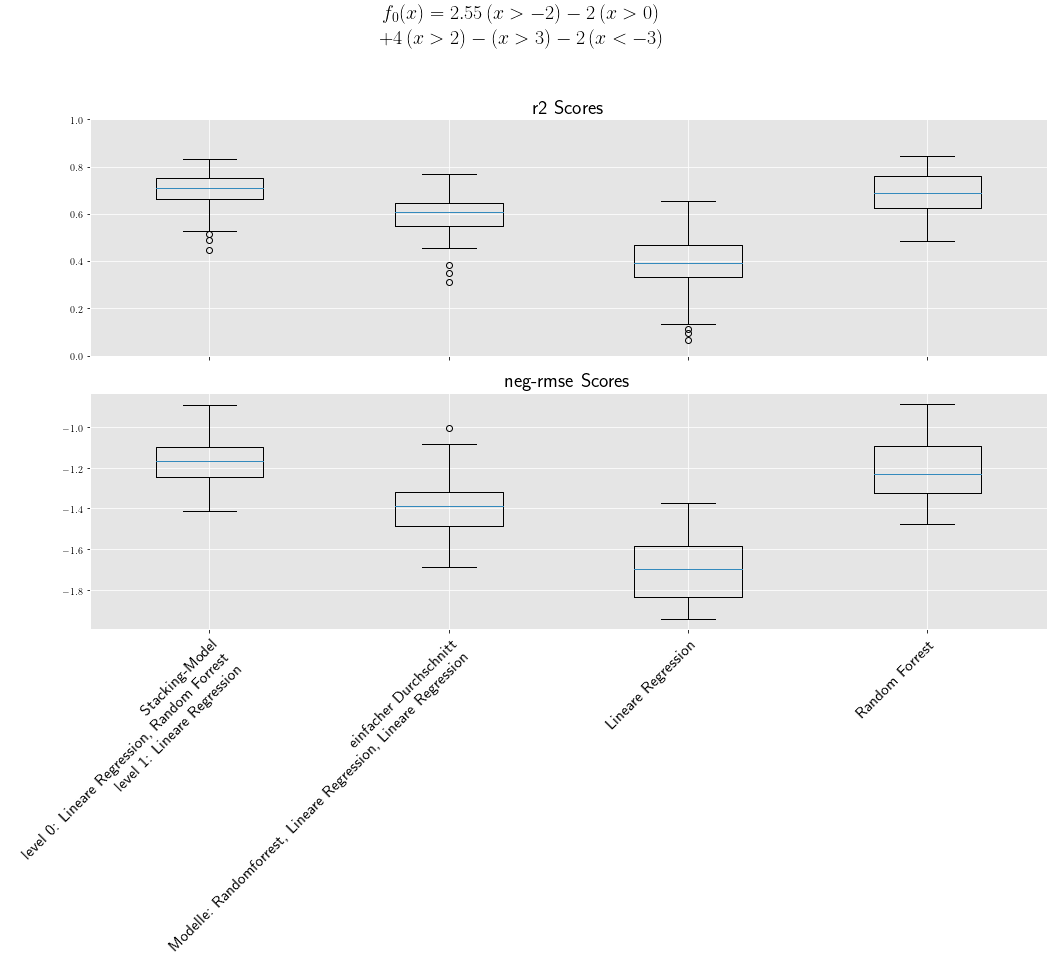

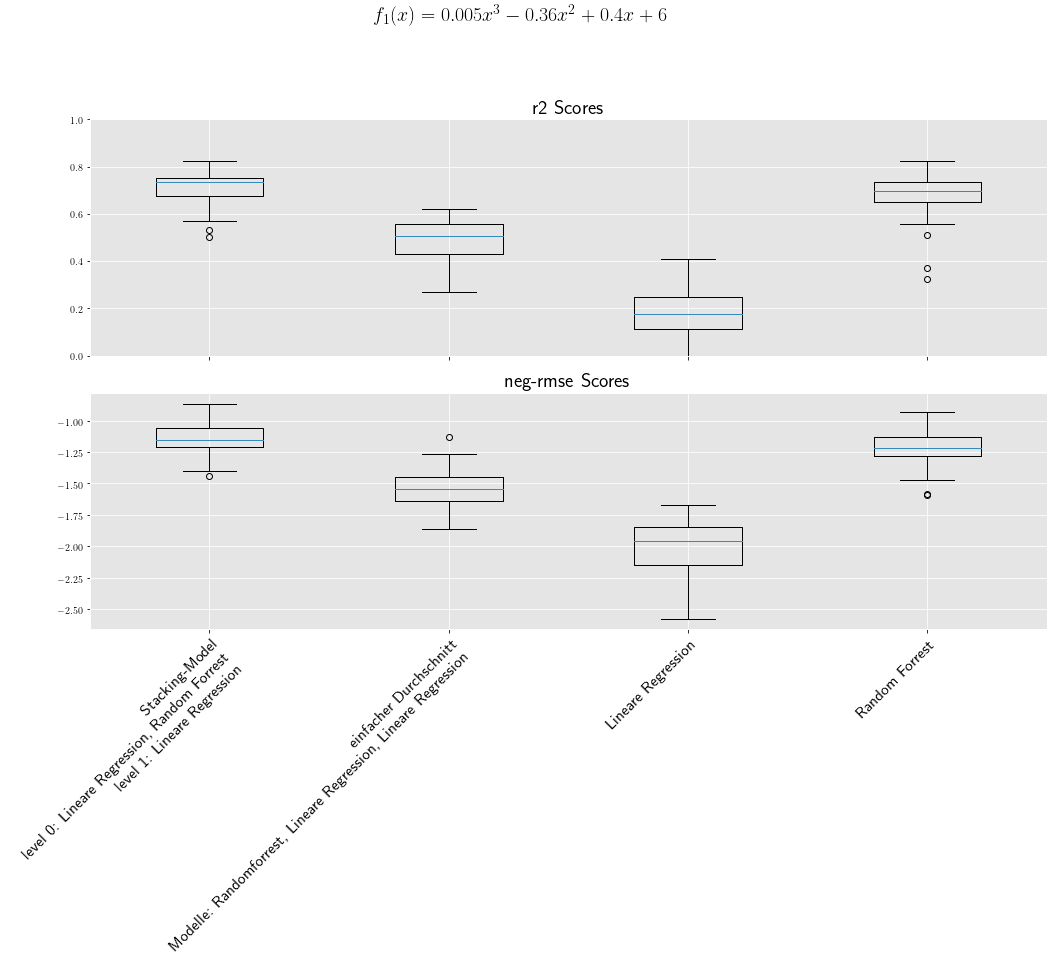

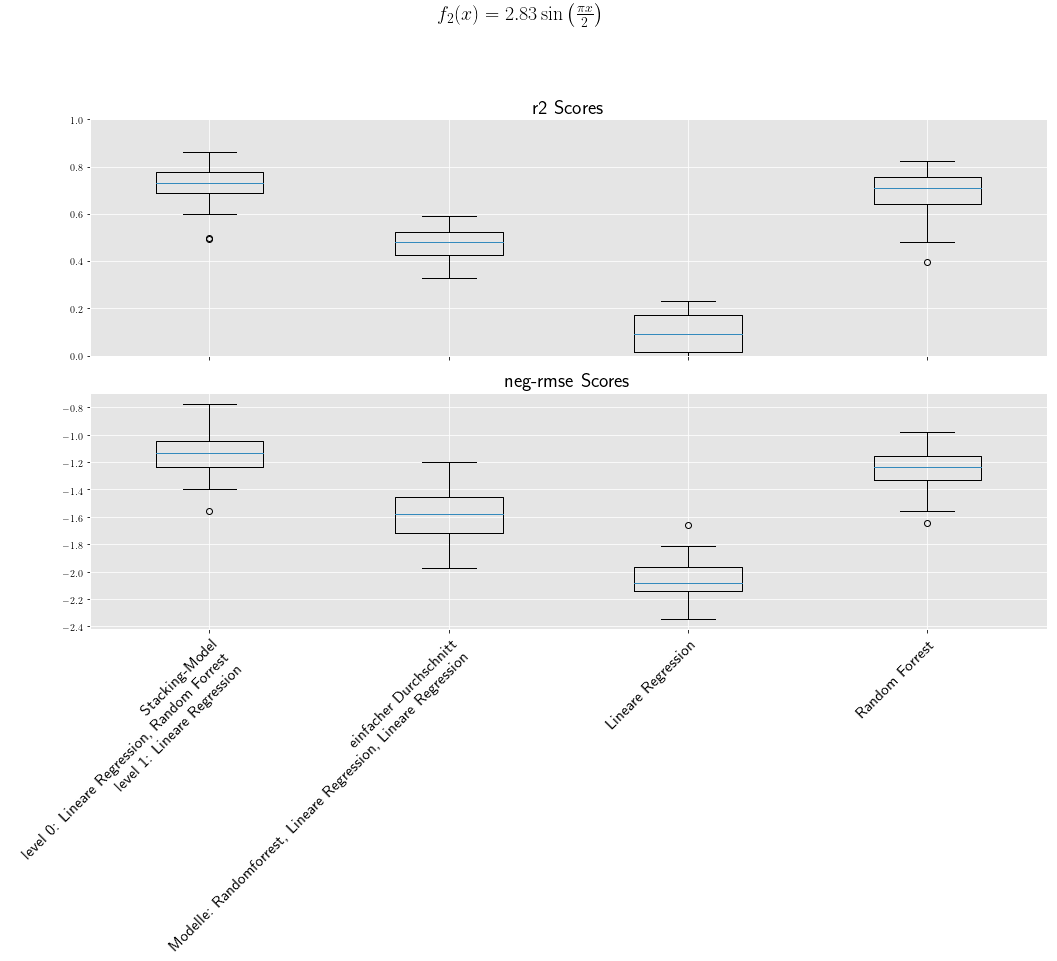

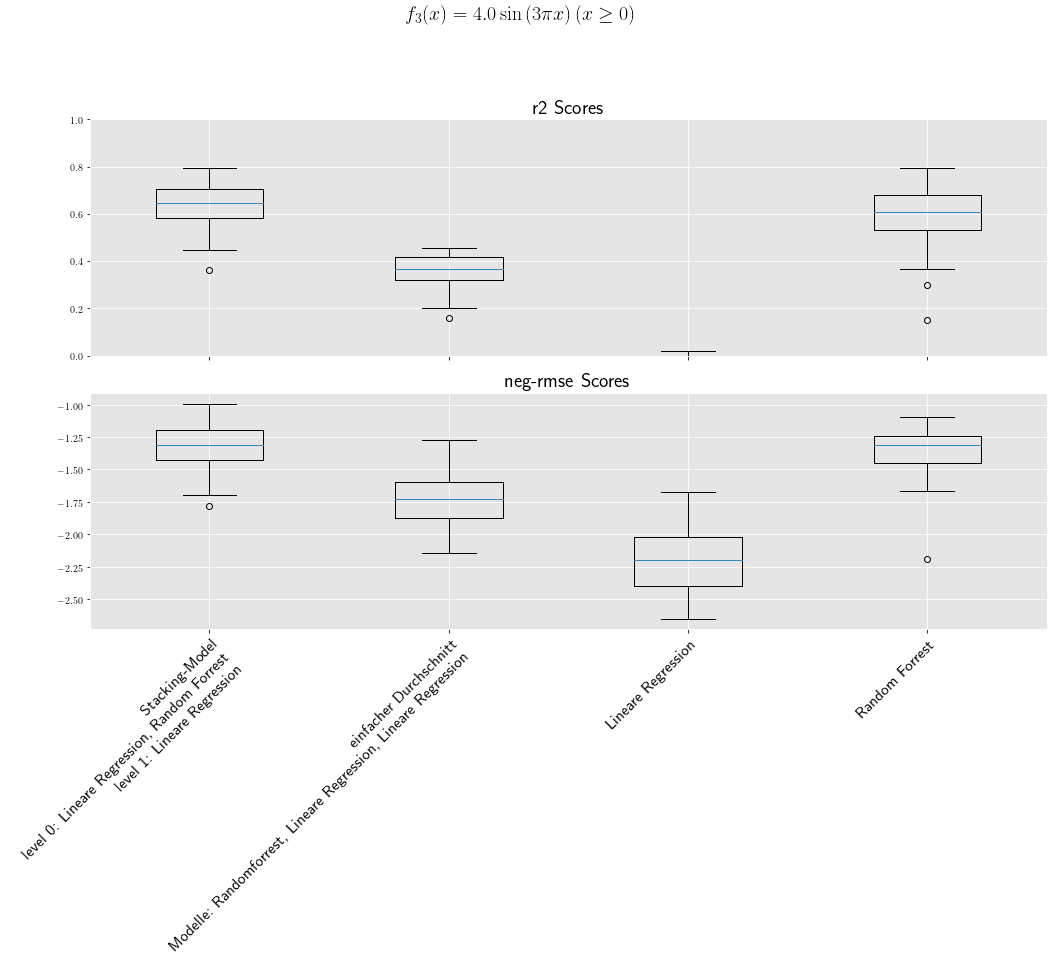

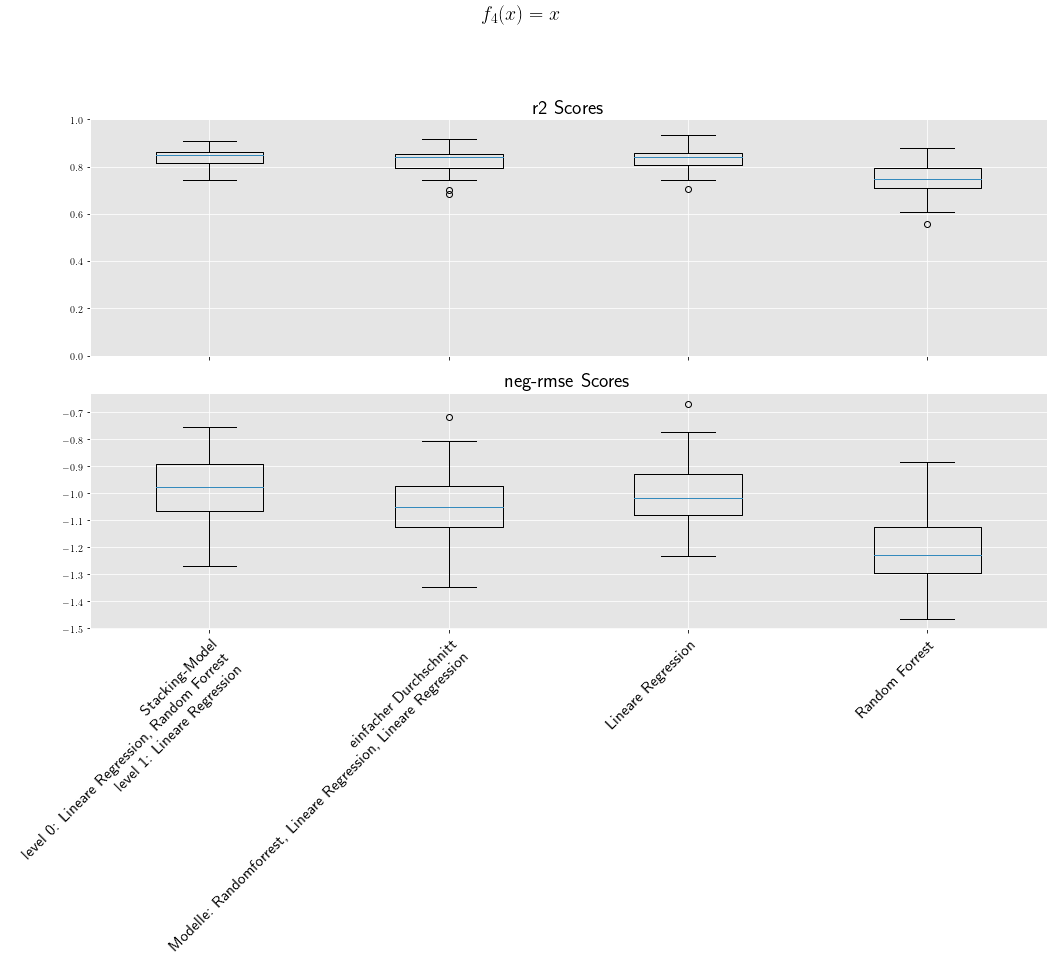

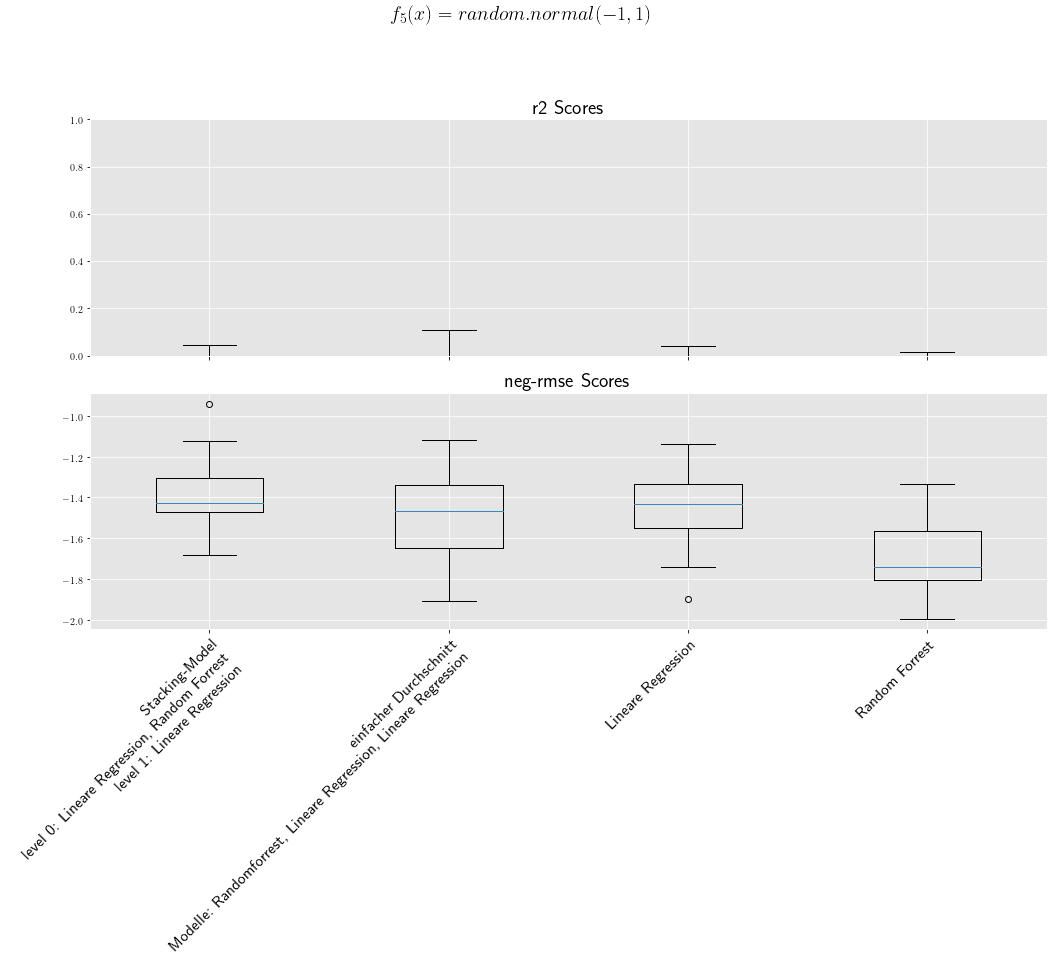

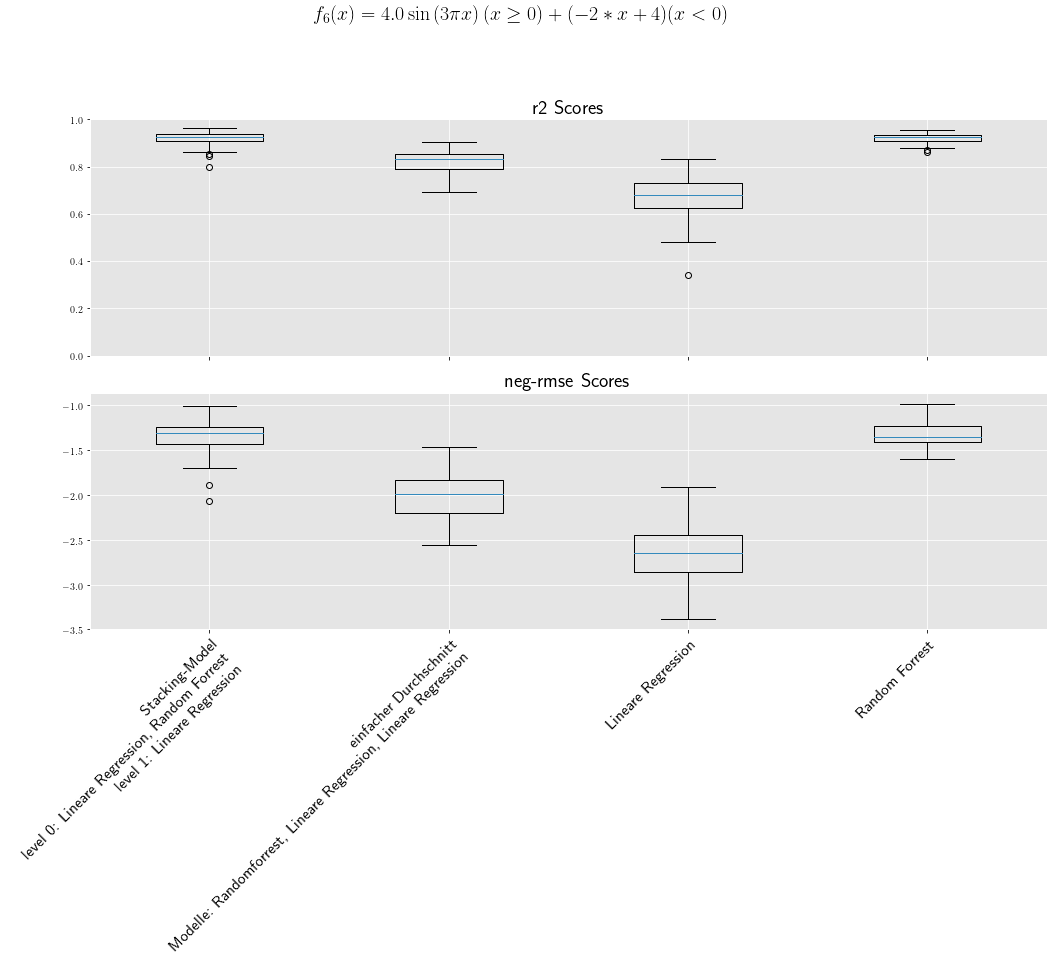

r2 [[ 0.69753508  0.71107411  0.72124391  0.63918987  0.84025952 -0.04730763
   0.91711592]
 [ 0.59466856  0.49082264  0.47867592  0.35851181  0.82370631 -0.13199102
   0.82352363]
 [ 0.38744101  0.15859614  0.08879129 -0.03908707  0.83325581 -0.03318264
   0.66991612]
 [ 0.68887042  0.68114292  0.68689996  0.5860122   0.74784453 -0.5762585
   0.92193505]]


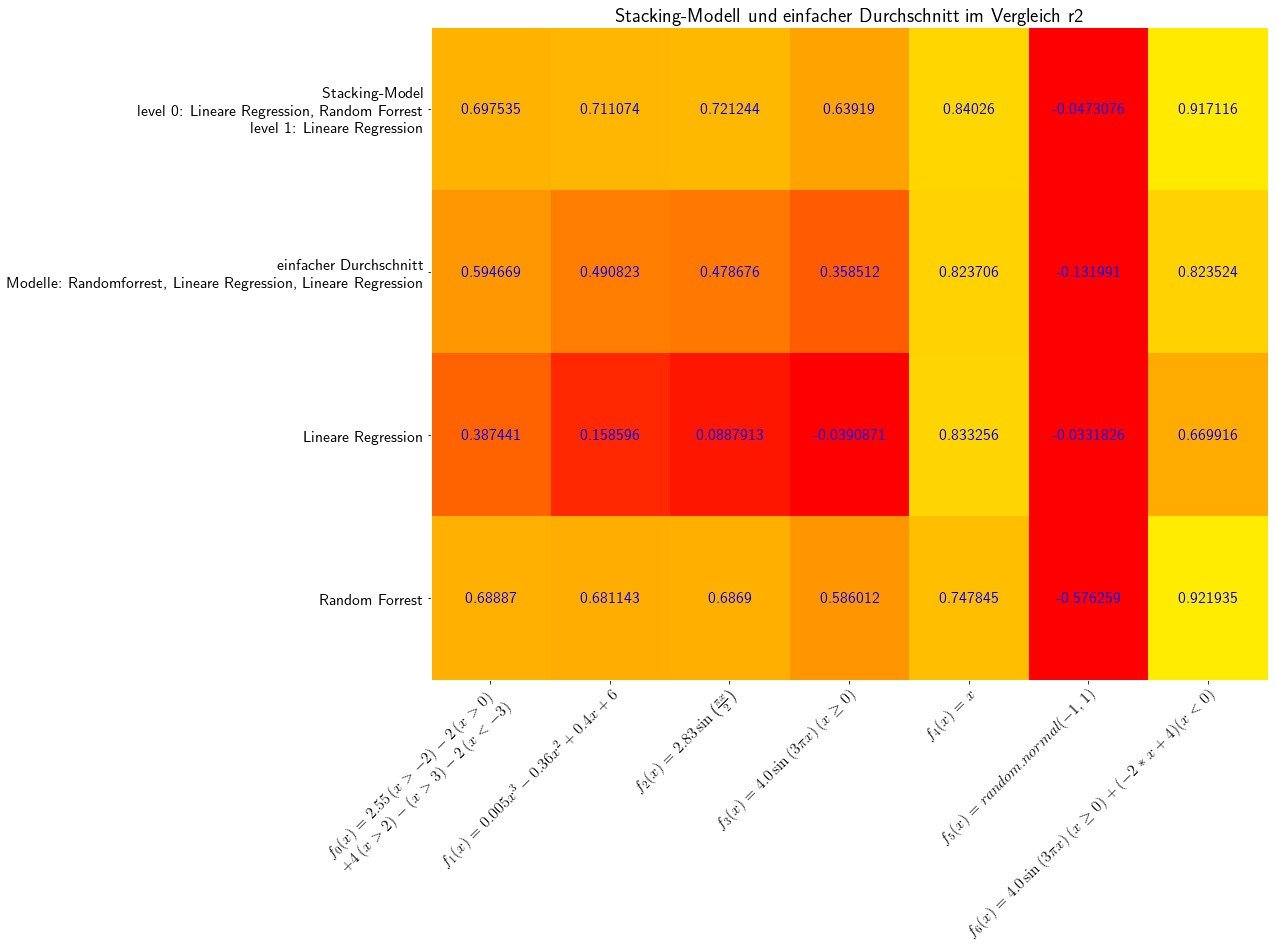

neg-rmse [[-1.16896872 -1.14680361 -1.14397968 -1.31341822 -0.98250845 -1.39678774
  -1.34909066]
 [-1.38880575 -1.54038372 -1.59796049 -1.71155393 -1.04482558 -1.4766389
  -2.01481136]
 [-1.69958347 -2.00245149 -2.06606682 -2.20753208 -1.01102761 -1.43818936
  -2.65458473]
 [-1.21390504 -1.21128438 -1.23708419 -1.35240829 -1.21028227 -1.70451865
  -1.33311065]]


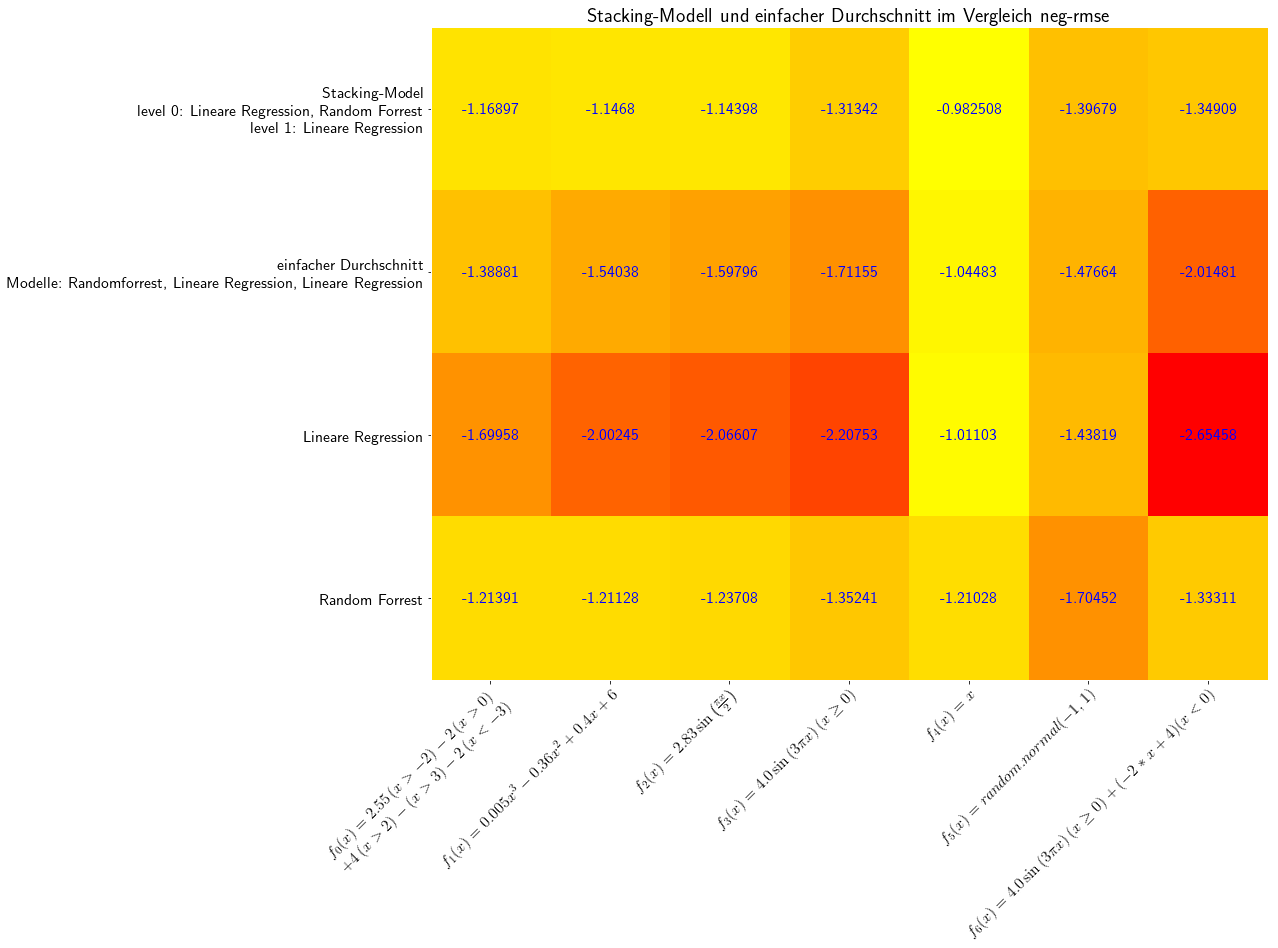

In [14]:
two_newline= r'\newline'*2
models = [(stacking_model,  
           f'''\\raggedleft Stacking-Model {two_newline}
     level 0: Lineare Regression, Random Forrest {two_newline}
     level 1: Lineare Regression'''),  
          
          (averageging_model, f'''einfacher Durchschnitt {two_newline}
          Modelle: Randomforrest, Lineare Regression, Lineare Regression'''),
          
          (linear_regression_model, "Lineare Regression"),
          (random_forrest_model, "Random Forrest"),
          
          ]

_ = compare_models(models,
               function_list,scores={'r2':'r2', 'neg-rmse': neg_rmse_score},
               score_ranges=[(0,1),(None,None)],
               title="Stacking-Modell und einfacher Durchschnitt im Vergleich")


wie zu erkennen ist sind die meisten Werte aus der differenz positiv. Stacking schneidet meist besser ab als der einfache Durchschnitt.
Das Ergebniss für Funktion $f_4(x)$ ist unerwartet. Lässt sich aber dahingehend erklären der einfache Durchschnitt zwei lineare Modelle verwendet. Somit fallen diese Modelle stärker ins Gewicht.
Da die ausgangsfunktion eine lineare Funktion ist, ist für  diese Funktion ein Stacking verfahren ungeeignet um bessere Vorhersagen als lineare Regression zu erziehlen.




Hypothese: Das Stacking verfahren ist eine intelligent gewichteter Durchschnitt  und kann mittels auslesen der Gewichte nachgebaut werden.


In [15]:
func = function_list[0]
X,y_noise = func.make(noise=1, random_state=RANDOM_STATE)
stacking_model.fit(X,y_noise)
random_forrest_model.fit(X,y_noise)
linear_regression_model.fit(X,y_noise)


meta_model = stacking_model.meta_model_
intercept = meta_model.intercept_
coef = meta_model.coef_
intercept
coef

points = np.linspace(1,10,20).reshape(-1,1)
#print(points)

print(intercept)
result_sim =intercept+(random_forrest_model.predict(points)*coef[1] + linear_regression_model.predict(points)* coef[0])
print(result_sim)
result = stacking_model.predict(points)
print(result)
print(result-result_sim)

0.05982091490107333
[0.70958793 1.42300545 1.34024467 4.0332009  3.88760824 2.43092569
 3.95652871 3.29774344 3.38196753 3.46619161 3.5504157  3.63463979
 3.71886388 3.80308796 3.88731205 3.97153614 4.05576023 4.13998431
 4.2242084  4.30843249]
[0.81608773 1.52563476 1.60135278 3.81158026 3.84774686 2.62729936
 3.93442225 3.54761615 3.63187357 3.716131   3.80038842 3.88464585
 3.96890327 4.0531607  4.13741812 4.22167555 4.30593297 4.3901904
 4.47444782 4.55870525]
[ 0.1064998   0.10262931  0.26110811 -0.22162064 -0.03986138  0.19637368
 -0.02210646  0.24987271  0.24990604  0.24993938  0.24997272  0.25000606
  0.25003939  0.25007273  0.25010607  0.25013941  0.25017274  0.25020608
  0.25023942  0.25027276]


Stacking  ist komplizierter, als nur eine inteligente Gewichtung, da alle Modelle, die mittels Cross Validation erzeugt werden verwendet werden. Somit mit in die Gewichtung beachtet werden.

Im Grafischen vergleich werden die Unterschiede der Modelle sichtbar

Da es so scheint dass die Funktion $f_3(x)$ eine interesante Eigenschaft des Stacking-Modells beschreibt. Wird die Funktion $f_3(x)$ genauer betrachtet und untersucht.
Es wird die Hpyothese aufgestellt, dass das Ergebniss warhscheinlich eine kombination beider Modelle sein wird und die Unterscheidung zwischen den beiden Teil-Funktionen nicht getroffen wird, weil das Level-1 Modell keine trennung auf basis der X-Werte treffen kann wird, da dem Level-1 Modell die X-Werte unbekannt sind. 

In [16]:
f_3 = function_list[3]

[0.29244877 0.69063968]
[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)]
[0.29244877 0.69063968]
[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=Fals

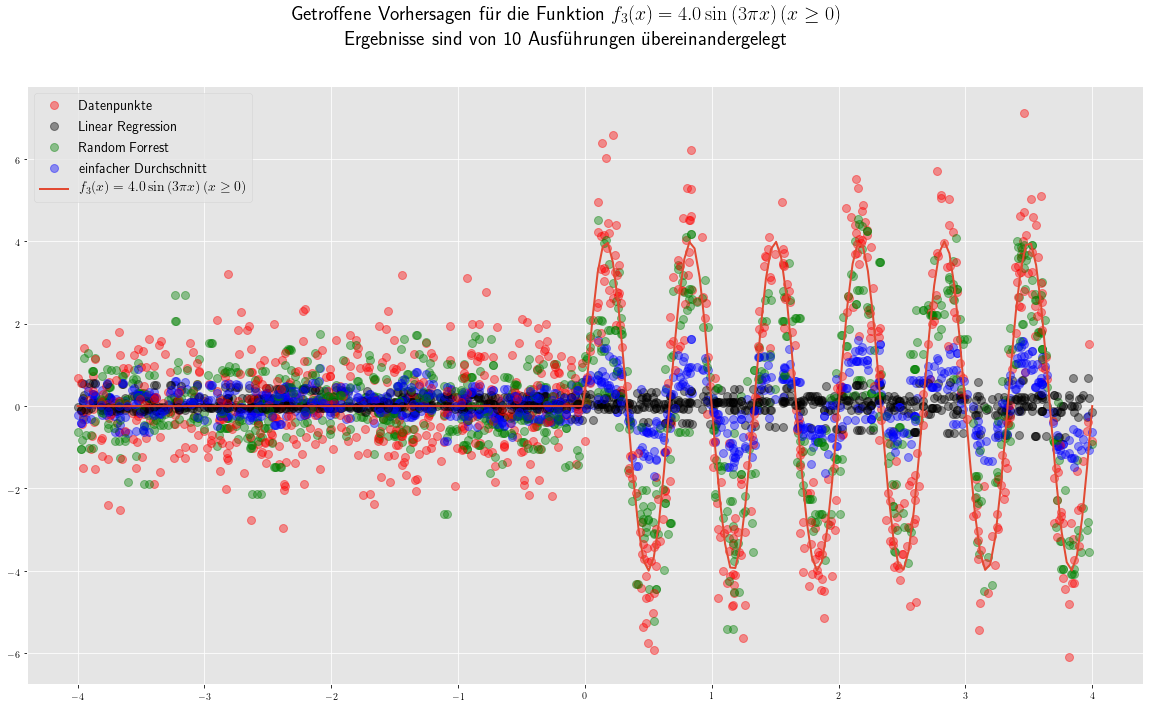

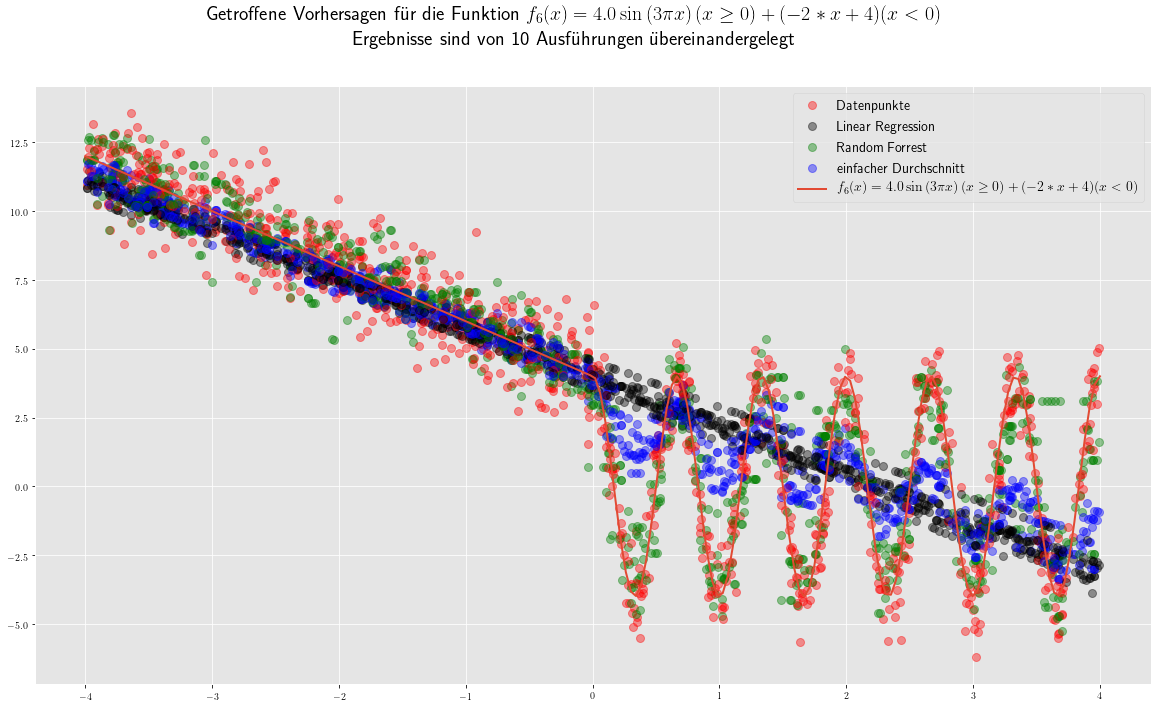

In [17]:
functions_to_observe = [function_list[3],function_list[6]]

def fit_and_plt(ax,model, X_train, X_test, y_train, y_test,color,label):
    model.fit(X_train,y_train)
    ax.plot(X_test, model.predict(X_test),'ob', c=color,label=label,alpha=0.4)


for func in functions_to_observe:
    fig, ax = plt.subplots(ncols=1, nrows=(1))
    fig.set_size_inches(20,11)
    for i in range(10):
        X,y_noise = func.make(noise=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y_noise, test_size=0.5, random_state=42)
        ax.plot(X_test,y_test,'ob',c='red',alpha=0.4, label="Datenpunkte" if i == 0 else "")

        fit_and_plt(ax, linear_regression_model, X_train, X_test, y_train, y_test,'black',"Linear Regression" if i== 0 else "")
        fit_and_plt(ax, random_forrest_model, X_train, X_test, y_train, y_test,'green',"Random Forrest" if i== 0 else "")
        
        fit_and_plt(ax, averageging_model, X_train, X_test, y_train, y_test,'blue',"einfacher Durchschnitt" if i== 0 else "")
       # fit_and_plt(ax, stacking_model, X_train, X_test, y_train, y_test,'green',"Stacking-Modell" if i== 0 else "")


    func.plot(ax)
    fig.suptitle(f"Getroffene Vorhersagen für die Funktion {func} \n Ergebnisse sind von 10 Ausführungen übereinandergelegt", fontsize=20)
    ax.legend()
    fig.savefig(f"output_files/_averaging{repr(func)[1:6]}.pdf", bbox_inches='tight')

    print(stacking_model.meta_model_.coef_)
    print(stacking_model.base_models)

Koeffizienten des Level-1 Modells [-1.63640238  0.80132501]
[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)]
Koeffizienten des Level-1 Modells [-0.02443934  1.01980884]
[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
 

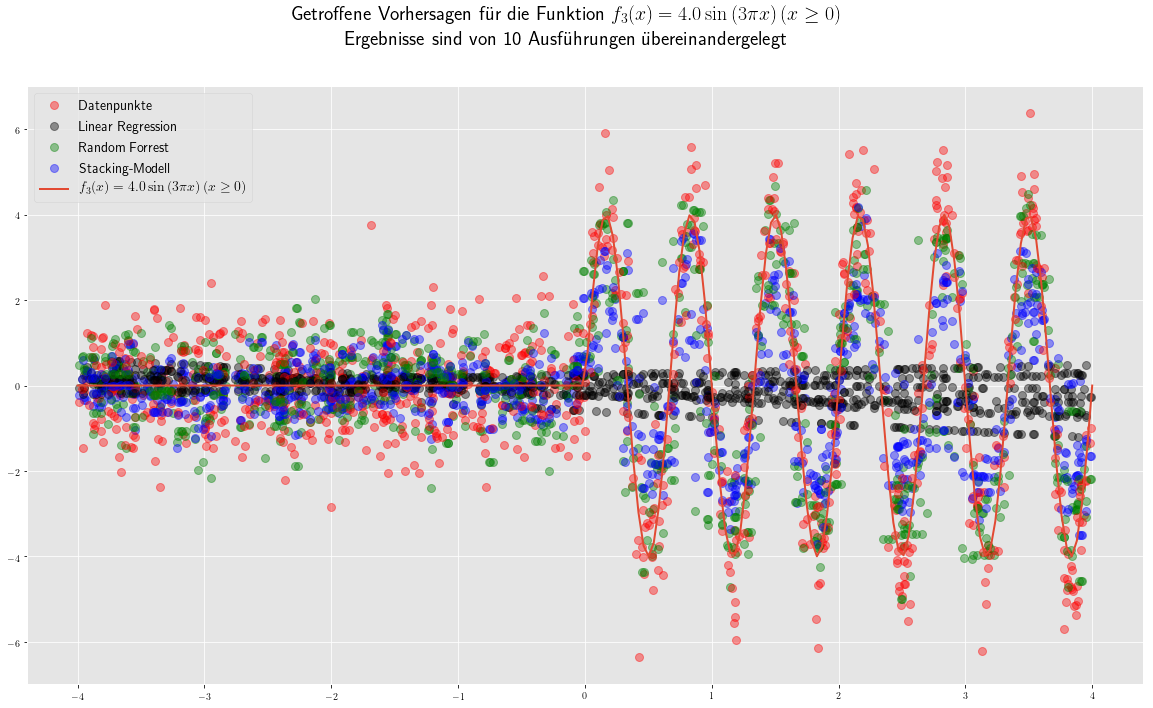

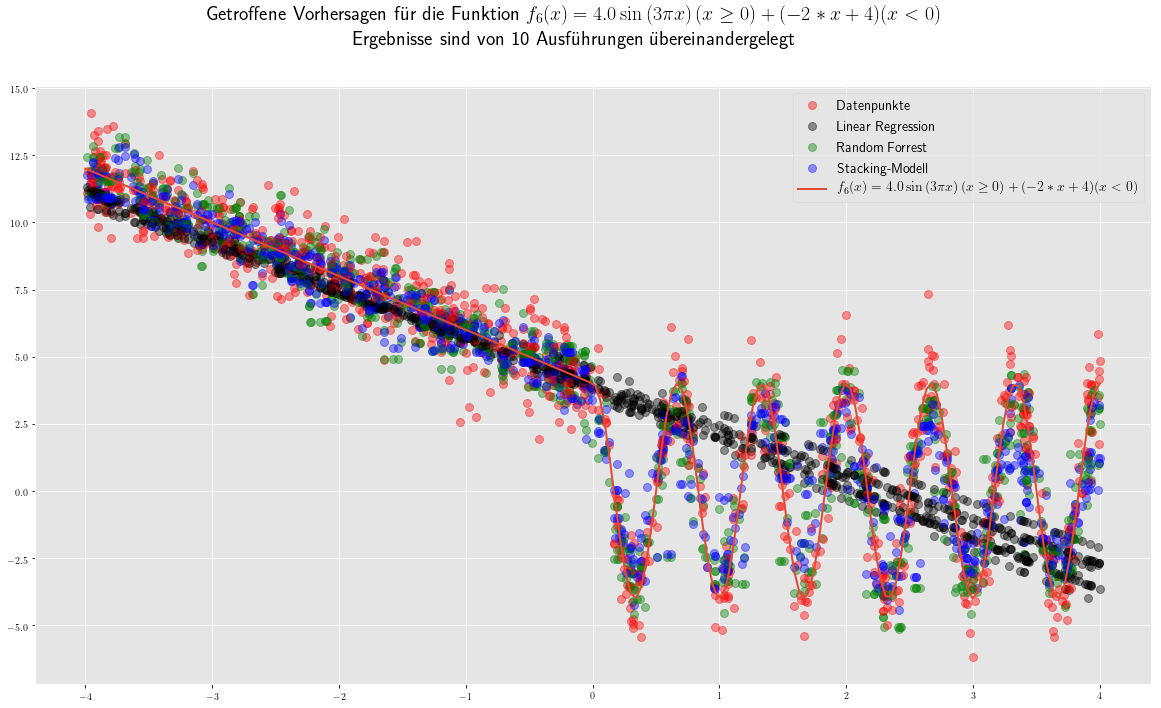

In [18]:
functions_to_observe = [function_list[3],function_list[6]]

def fit_and_plt(ax,model, X_train, X_test, y_train, y_test,color,label):
    model.fit(X_train,y_train)
    ax.plot(X_test, model.predict(X_test),'ob', c=color,label=label,alpha=0.4)


for func in functions_to_observe:
    fig, ax = plt.subplots(ncols=1, nrows=(1))
    fig.set_size_inches(20,11)
    for i in range(10):
        X,y_noise = func.make(noise=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y_noise, test_size=0.5, random_state=42)
        ax.plot(X_test,y_test,'ob',c='red',alpha=0.4, label="Datenpunkte" if i == 0 else "")

        fit_and_plt(ax, linear_regression_model, X_train, X_test, y_train, y_test,'black',"Linear Regression" if i== 0 else "")
        fit_and_plt(ax, random_forrest_model, X_train, X_test, y_train, y_test,'green',"Random Forrest" if i== 0 else "")
        
       # fit_and_plt(ax, averageging_model, X_train, X_test, y_train, y_test,'blue',"einfacher Durchschnitt" if i== 0 else "")
        fit_and_plt(ax, stacking_model, X_train, X_test, y_train, y_test,'blue',"Stacking-Modell" if i== 0 else "")


    func.plot(ax)
    fig.suptitle(f"Getroffene Vorhersagen für die Funktion {func} \n Ergebnisse sind von 10 Ausführungen übereinandergelegt", fontsize=20)
    ax.legend()
    fig.savefig(f"output_files/_stacking{repr(func)[1:6]}.pdf", bbox_inches='tight')

    print("Koeffizienten des Level-1 Modells",stacking_model.meta_model_.coef_)
    print(stacking_model.base_models)

Es stellt sich heraus, dass die Ergebnisse hauptsächlich vom Random Forest stammen und lineare Regression sogar negativ gewichtet wurde. Dies fällt beim Graph auf , da der lineare Teil der Funktion (x < 0), die ungenauen vorhersagen vom Random Forest bevorzugt.